In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from torchmetrics.functional import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('data/AAPL/1d_features.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]

In [3]:
result = adfuller(train['close'])
print('p-value: ', result[1])
result = adfuller(train['close'].diff().dropna())
print('p-value: ', result[1])

p-value:  0.9990835156248085
p-value:  2.1981192963210147e-20


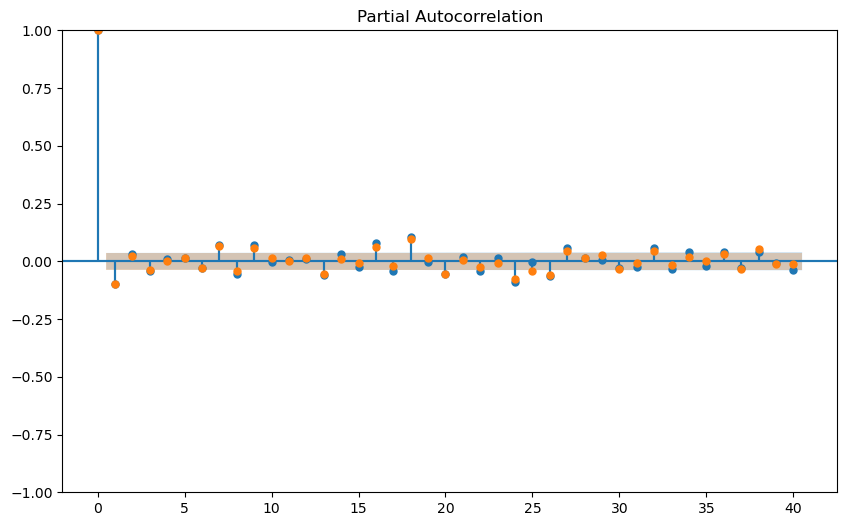

In [4]:
plt.figure(figsize=(10, 6))
plot_acf(train['close'].diff().dropna(), lags=40, ax=plt.gca())
plot_pacf(train['close'].diff().dropna(), lags=40, ax=plt.gca())
plt.show()

In [5]:
model = ARIMA(train['close'].values, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2953
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4221.177
Date:                Tue, 08 Oct 2024   AIC                           8448.354
Time:                        14:46:16   BIC                           8466.325
Sample:                             0   HQIC                          8454.824
                               - 2953                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4463      0.060     -7.395      0.000      -0.565      -0.328
ma.L1          0.3548      0.063      5.632      0.000       0.231       0.478
sigma2         1.0222      0.008    126.928      0.000       1.006       1.038
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             49404.68
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              49.76   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
preds = model_fit.forecast(steps=len(test))
preds.shape

(739,)

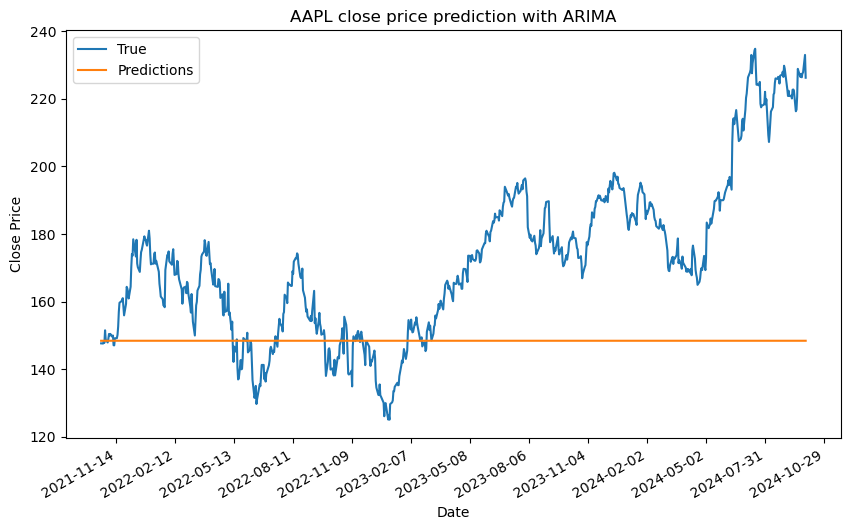

In [7]:
fig = plt.figure(figsize=(10, 6))
plt.title('AAPL close price prediction with ARIMA')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))
plt.plot(test['datetime'], test['close'], label='True')
plt.plot(test['datetime'], preds, label='Predictions')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [8]:
pred = torch.tensor(preds)
true = torch.tensor(test['close'].values)
preds.shape, true.shape

((739,), torch.Size([739]))

In [9]:
print(f'MAE: {mean_absolute_error(pred, true)}')
print(f'MSE: {mean_squared_error(pred, true)}')
print(f'MAPE: {mean_absolute_percentage_error(pred, true)}')

MAE: 26.30746092043735
MSE: 1126.0265144367122
MAPE: 0.14097390186136718
